In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import shapely.wkt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set up matplotlib to work interactively
%matplotlib inline

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.  
Documention for installing watermark: https://github.com/rasbt/watermark

In [2]:
%reload_ext watermark
%watermark -v -p pandas,numpy,seaborn,geopandas,shapely.wkt,matplotlib.pyplot

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

pandas           : 1.4.2
numpy            : 1.22.4
seaborn          : 0.11.2
geopandas        : 0.9.0
shapely.wkt      : unknown
matplotlib.pyplot: unknown



In [3]:
%ls

README.md                      examples.ipynb
bldgs-before-1900.csv          mybinder-data-wrangling.ipynb


In [4]:
bldgs_before_1900 = pd.read_csv('bldgs-before-1900.csv')

print(bldgs_before_1900.shape)
bldgs_before_1900.head()

(42854, 16)


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96239465160933 40.64332930...,NaN,3417314,1899.0,08/17/2017 12:00:00 AM,Constructed,1191341,13.457282,5110.0,34.0,0,0,3051480051,3051480051,Photogramm,{97F42C6B-990E-48AF-8C08-1D3E92B57B38}
1,MULTIPOLYGON (((-74.14983332006722 40.55011975...,NaN,5065718,1899.0,08/22/2017 12:00:00 AM,Constructed,290792,28.680000,2100.0,73.0,0,0,5051430040,5051430040,Photogramm,{280360D8-DA85-464E-9EBD-58ADFC8B90E0}
2,MULTIPOLYGON (((-73.95541518712452 40.77167243...,NaN,1045196,1899.0,08/22/2017 12:00:00 AM,Constructed,562430,50.120000,2100.0,39.0,0,0,1014510146,1014510146,Photogramm,{6CCB3321-BF3C-44F5-92B8-9490198875D8}
3,MULTIPOLYGON (((-73.9630909105247 40.714212277...,NaN,3062926,1899.0,08/22/2017 12:00:00 AM,Constructed,663480,35.566775,2100.0,50.0,0,0,3024050006,3024050006,Photogramm,{8DC9D967-A94A-424E-B7B8-7D5C35417CA4}
4,MULTIPOLYGON (((-73.92745352676555 40.68188163...,NaN,3047568,1899.0,08/22/2017 12:00:00 AM,Constructed,615727,32.500000,2100.0,59.0,0,0,3016820024,3016820024,Photogramm,{DC6463F1-9301-427A-BF05-2B57777EDD9D}


In [5]:
# printing the column names, non-null counts, and data types of our columns
bldgs_before_1900.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42854 entries, 0 to 42853
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    42854 non-null  object 
 1   NAME        64 non-null     object 
 2   BIN         42854 non-null  int64  
 3   CNSTRCT_YR  42854 non-null  float64
 4   LSTMODDATE  42854 non-null  object 
 5   LSTSTATYPE  42853 non-null  object 
 6   DOITT_ID    42854 non-null  int64  
 7   HEIGHTROOF  42849 non-null  float64
 8   FEAT_CODE   42854 non-null  float64
 9   GROUNDELEV  42853 non-null  float64
 10  SHAPE_AREA  42854 non-null  int64  
 11  SHAPE_LEN   42854 non-null  int64  
 12  BASE_BBL    42854 non-null  int64  
 13  MPLUTO_BBL  42854 non-null  int64  
 14  GEOMSOURCE  42853 non-null  object 
 15  GLOBALID    42854 non-null  object 
dtypes: float64(4), int64(6), object(6)
memory usage: 5.2+ MB


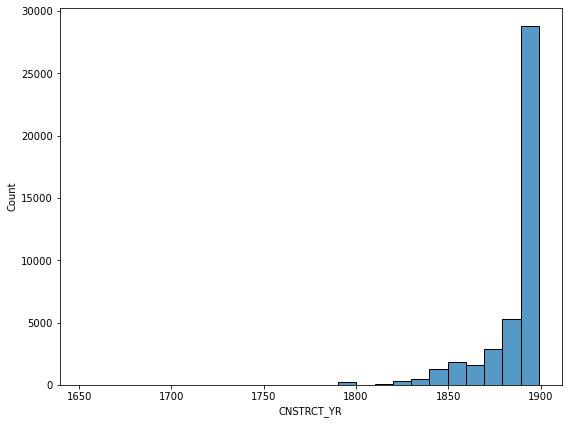

In [6]:
plt.figure(figsize=(8, 6))

sns.histplot(bldgs_before_1900['CNSTRCT_YR'], bins=25)

plt.tight_layout()

In [7]:
by_year = (
    bldgs_before_1900
    .groupby('CNSTRCT_YR')[['DOITT_ID']].count()
    .rename(columns={'DOITT_ID': 'count'})
    .reset_index()
)

by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

,CNSTRCT_YR,count
0,1652,1
1,1661,2
2,1680,1
3,1690,1
4,1694,1


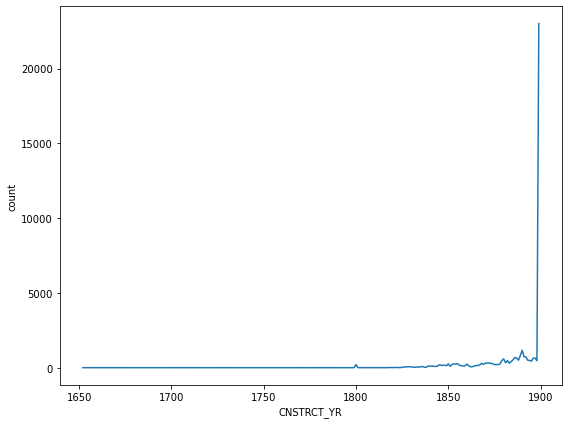

In [8]:
plt.figure(figsize=(8, 6))

sns.lineplot(
    data=by_year, 
    x="CNSTRCT_YR", 
    y="count"
)

plt.tight_layout()

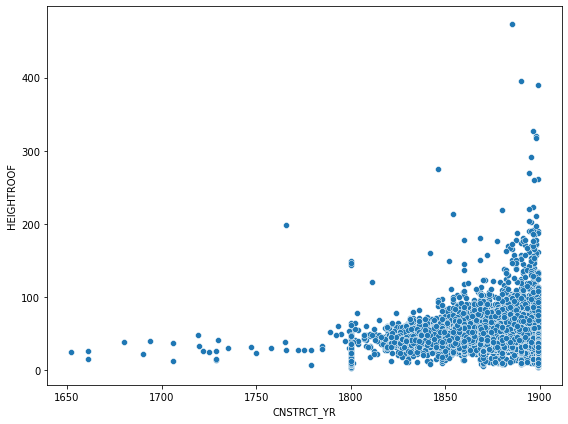

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=bldgs_before_1900['CNSTRCT_YR'],
    y=bldgs_before_1900['HEIGHTROOF']
)

plt.tight_layout()

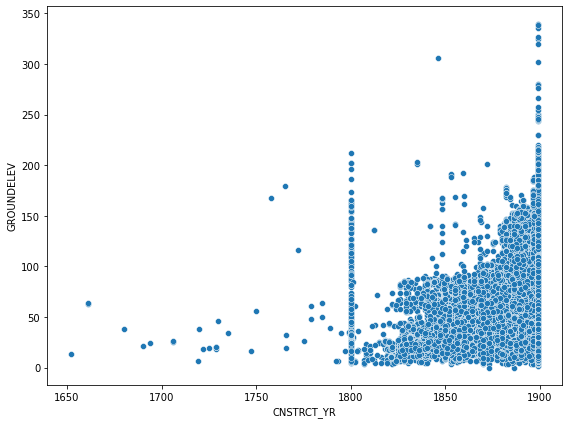

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=bldgs_before_1900['CNSTRCT_YR'],
    y=bldgs_before_1900['GROUNDELEV']
)

plt.tight_layout()

In [11]:
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [12]:
boros.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
geometry = bldgs_before_1900['the_geom'].map(shapely.wkt.loads)
gdf = gpd.GeoDataFrame(
    bldgs_before_1900,
    crs="EPSG:4326",
    geometry=geometry
)

gdf.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,geometry
0,MULTIPOLYGON (((-73.96239465160933 40.64332930...,NaN,3417314,1899.0,08/17/2017 12:00:00 AM,Constructed,1191341,13.457282,5110.0,34.0,0,0,3051480051,3051480051,Photogramm,{97F42C6B-990E-48AF-8C08-1D3E92B57B38},"MULTIPOLYGON (((-73.96239 40.64333, -73.96246 ..."
1,MULTIPOLYGON (((-74.14983332006722 40.55011975...,NaN,5065718,1899.0,08/22/2017 12:00:00 AM,Constructed,290792,28.680000,2100.0,73.0,0,0,5051430040,5051430040,Photogramm,{280360D8-DA85-464E-9EBD-58ADFC8B90E0},"MULTIPOLYGON (((-74.14983 40.55012, -74.14991 ..."
2,MULTIPOLYGON (((-73.95541518712452 40.77167243...,NaN,1045196,1899.0,08/22/2017 12:00:00 AM,Constructed,562430,50.120000,2100.0,39.0,0,0,1014510146,1014510146,Photogramm,{6CCB3321-BF3C-44F5-92B8-9490198875D8},"MULTIPOLYGON (((-73.95542 40.77167, -73.95551 ..."
3,MULTIPOLYGON (((-73.9630909105247 40.714212277...,NaN,3062926,1899.0,08/22/2017 12:00:00 AM,Constructed,663480,35.566775,2100.0,50.0,0,0,3024050006,3024050006,Photogramm,{8DC9D967-A94A-424E-B7B8-7D5C35417CA4},"MULTIPOLYGON (((-73.96309 40.71421, -73.96312 ..."
4,MULTIPOLYGON (((-73.92745352676555 40.68188163...,NaN,3047568,1899.0,08/22/2017 12:00:00 AM,Constructed,615727,32.500000,2100.0,59.0,0,0,3016820024,3016820024,Photogramm,{DC6463F1-9301-427A-BF05-2B57777EDD9D},"MULTIPOLYGON (((-73.92745 40.68188, -73.92745 ..."


In [14]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [15]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf = gdf.to_crs(2263)

gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

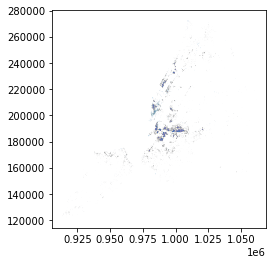

In [17]:
gdf.plot()

<AxesSubplot:>

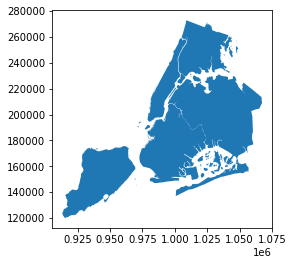

In [18]:
boros.plot()

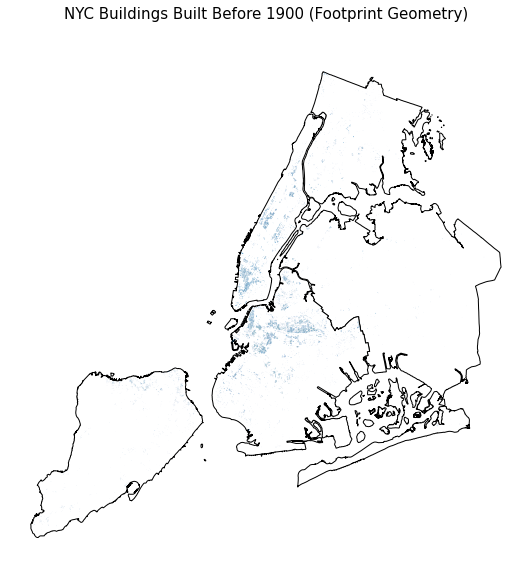

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.plot(
    ax=ax, 
    zorder=1
)

boros.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
) 

ax.set_title('NYC Buildings Built Before 1900 (Footprint Geometry)', pad=30, fontsize=15)
plt.axis('off')
fig.tight_layout()

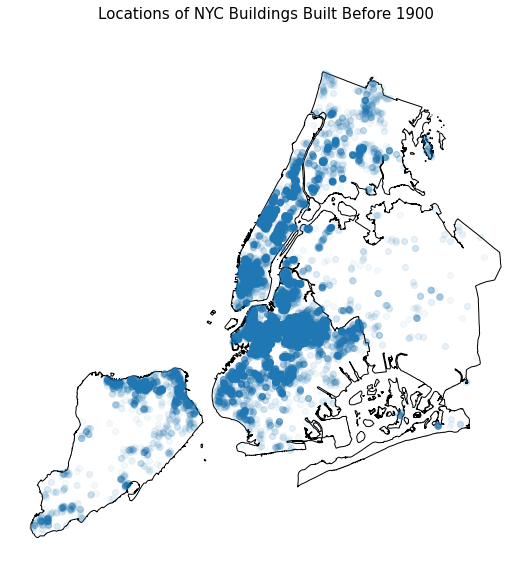

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf.centroid.plot(
    ax=ax, 
    zorder=1,
    alpha=.05
)

boros.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

ax.set_title('Locations of NYC Buildings Built Before 1900', pad=30, fontsize=15)
plt.axis('off')
fig.tight_layout()

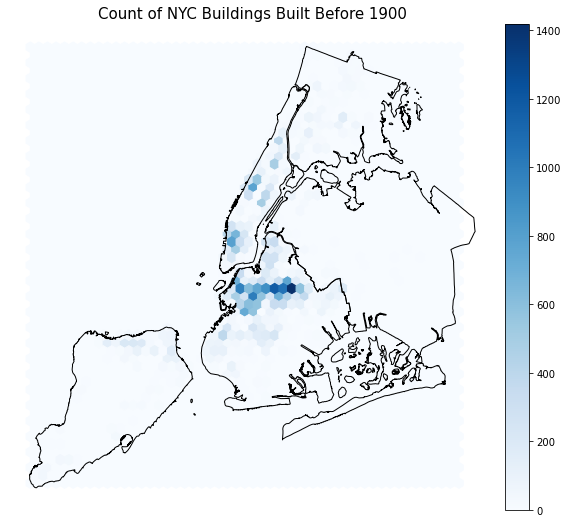

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

hb = ax.hexbin(
    gdf.centroid.x, 
    gdf.centroid.y, 
    gridsize=50, 
    cmap='Blues'
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

boros.plot(
    ax=ax, 
    color='None', 
    edgecolor='black', 
    zorder=1
)

plt.colorbar(hb, cax=cax)

ax.set_title("Count of NYC Buildings Built Before 1900", fontsize=15)
ax.axis('off')
plt.tight_layout()